In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np

from src.functions import *
from src.models import *
from src.optmizers import *

import matplotlib.pyplot as plt
%matplotlib inline 

# Load Cifar-10

In [2]:
transform = T.Compose( [ T.ToTensor(), T.Normalize( ( 0.5, ), ( 0.5, ) ) ] )

train_dataset = datasets.CIFAR10( root = './data', train = True, transform = transform, download = True )
val_dataset = datasets.CIFAR10( root = './data', train = False, transform = transform, download = True )

train_loader = DataLoader( train_dataset, batch_size = 64, shuffle = True )
val_loader = DataLoader( val_dataset, batch_size = 64, shuffle = False)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
cifar_classes = np.array( ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] )

# Torch Configuration

In [4]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )

In [5]:
model_data = {
    'name': [],
    'train_losses': [],
    'val_losses': [],
    'train_f1_scores': [],
    'val_f1_scores': [],
    'val_precision': [],
    'val_accuracy': [],
}

# Model Execution

## Simple CNN

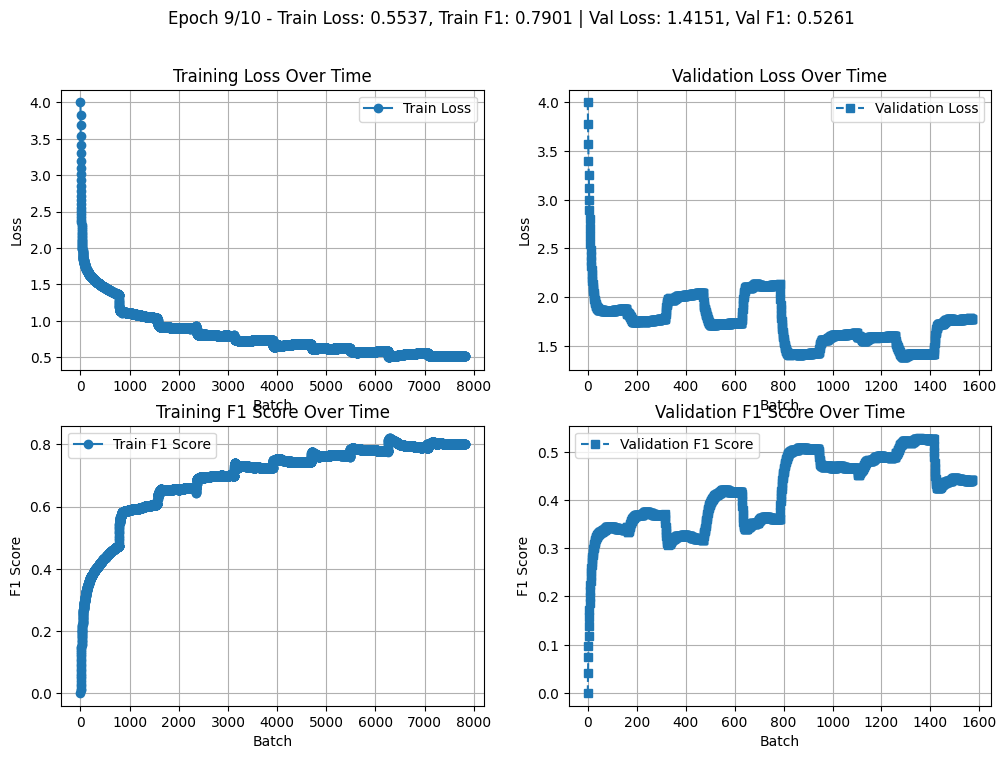

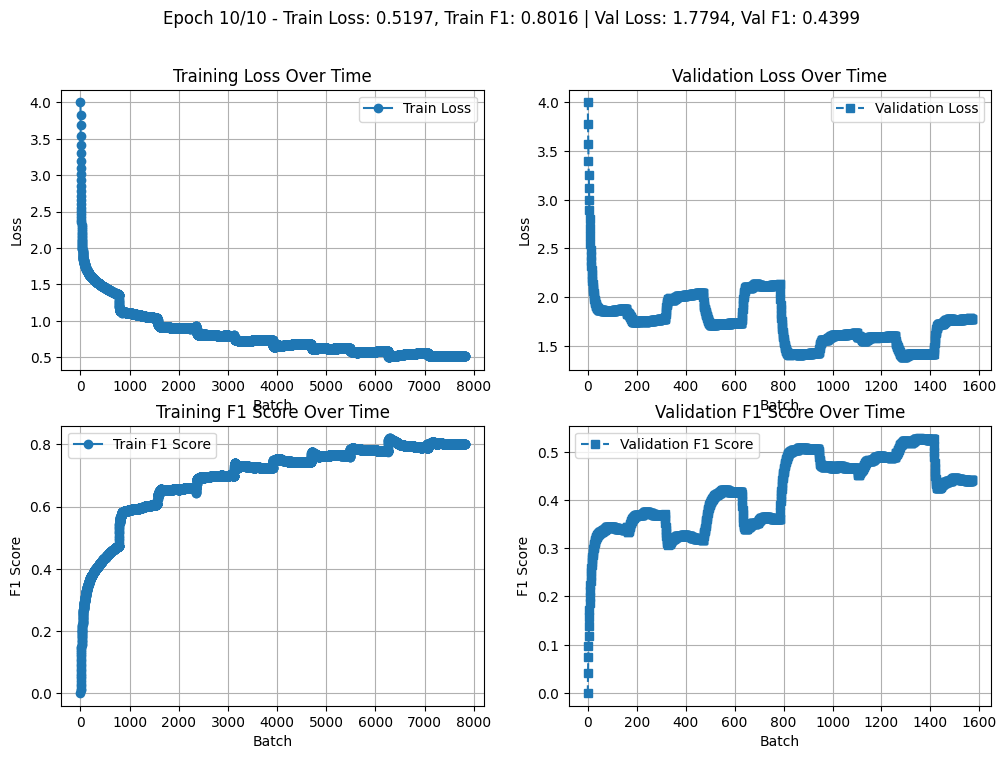

F1 Score: 0.4634, Precision: 0.6886, Accuracy: 0.4602
              precision    recall  f1-score   support

           0       0.76      0.47      0.58      1000
           1       0.98      0.26      0.41      1000
           2       0.66      0.28      0.39      1000
           3       0.47      0.28      0.35      1000
           4       0.31      0.78      0.44      1000
           5       0.87      0.19      0.31      1000
           6       0.26      0.96      0.41      1000
           7       0.96      0.27      0.42      1000
           8       0.82      0.57      0.67      1000
           9       0.79      0.54      0.64      1000

    accuracy                           0.46     10000
   macro avg       0.69      0.46      0.46     10000
weighted avg       0.69      0.46      0.46     10000



In [6]:
model_arch = 'simple_cnn'
model = CNNClassifier( model_arch, intermediate_activation = nn.ReLU )
optimizer = SAM( model.parameters(), base_optimizer = optim.AdamW, rho = 0.05, lr = 0.001, weight_decay = 0.01 )
train_losses, val_losses, train_f1_scores, val_f1_scores = train_and_evaluate( model, optimizer, train_loader, val_loader, 10, device, is_sam = True )

f1, precision, accuracy, report = evaluation( model, val_loader, device )
print( f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}" )
print( report )

model_data['name'].append( model_arch )
model_data['train_losses'].append( train_losses[-1] )
model_data['val_losses'].append( val_losses[-1] )
model_data['train_f1_scores'].append( train_f1_scores[-1] )
model_data['val_f1_scores'].append( val_f1_scores[-1] )
model_data['val_precision'].append( precision )
model_data['val_accuracy'].append( accuracy )


## Deeper CNN

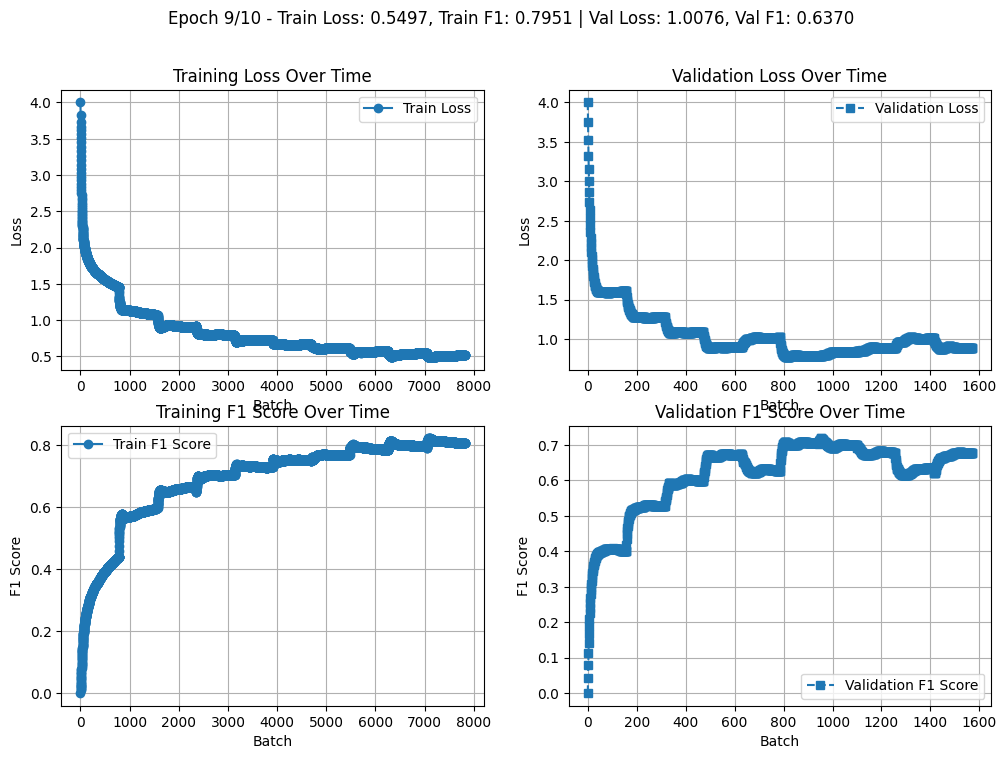

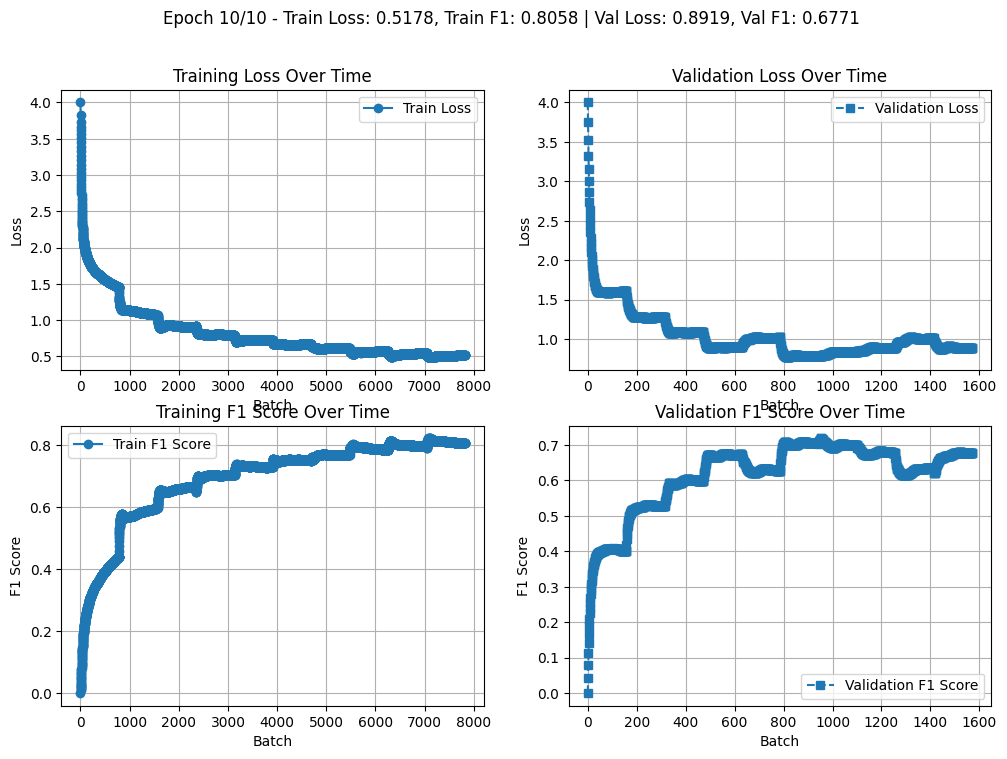

F1 Score: 0.6980, Precision: 0.7523, Accuracy: 0.6984
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.94      0.73      0.82      1000
           2       0.70      0.60      0.64      1000
           3       0.73      0.29      0.42      1000
           4       0.51      0.86      0.64      1000
           5       0.76      0.58      0.65      1000
           6       0.47      0.96      0.63      1000
           7       0.86      0.70      0.77      1000
           8       0.86      0.83      0.85      1000
           9       0.93      0.69      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.75      0.70      0.70     10000
weighted avg       0.75      0.70      0.70     10000



In [7]:
model_arch = 'deeper_cnn'
model = CNNClassifier( model_arch, intermediate_activation = nn.ReLU )
optimizer = SAM( model.parameters(), base_optimizer = optim.AdamW, rho = 0.05, lr = 0.001, weight_decay = 0.01 )
train_losses, val_losses, train_f1_scores, val_f1_scores = train_and_evaluate( model, optimizer, train_loader, val_loader, 10, device, is_sam = True )

f1, precision, accuracy, report = evaluation( model, val_loader, device )
print( f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}" )
print( report )

model_data['name'].append( model_arch )
model_data['train_losses'].append( train_losses[-1] )
model_data['val_losses'].append( val_losses[-1] )
model_data['train_f1_scores'].append( train_f1_scores[-1] )
model_data['val_f1_scores'].append( val_f1_scores[-1] )
model_data['val_precision'].append( precision )
model_data['val_accuracy'].append( accuracy )

## Wider CNN

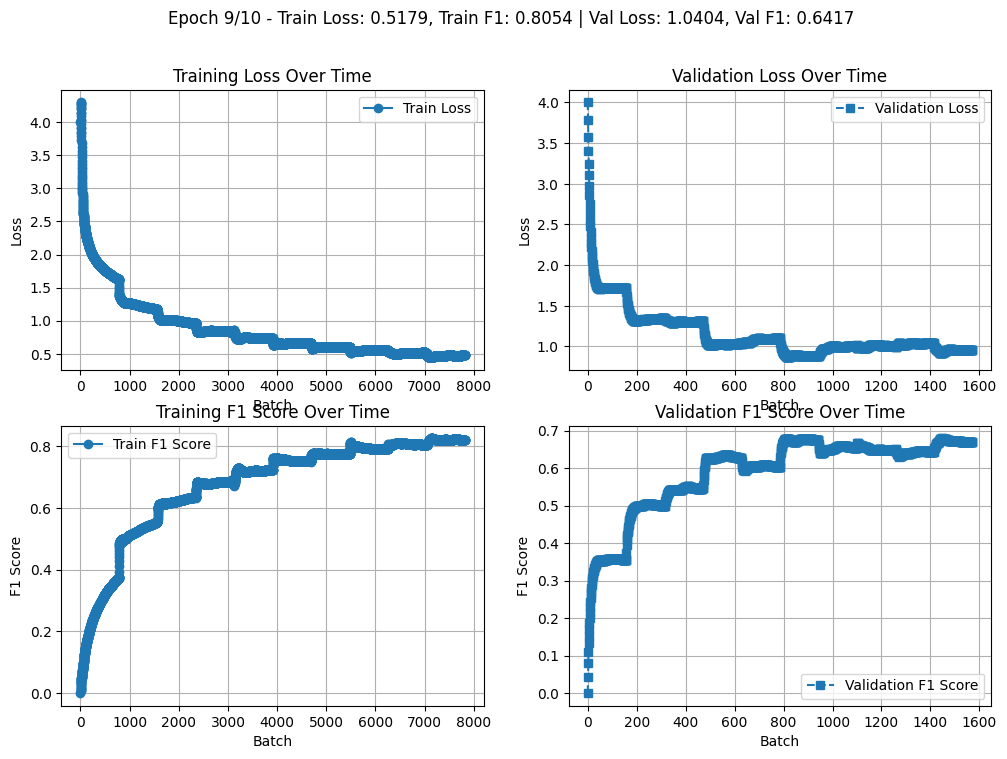

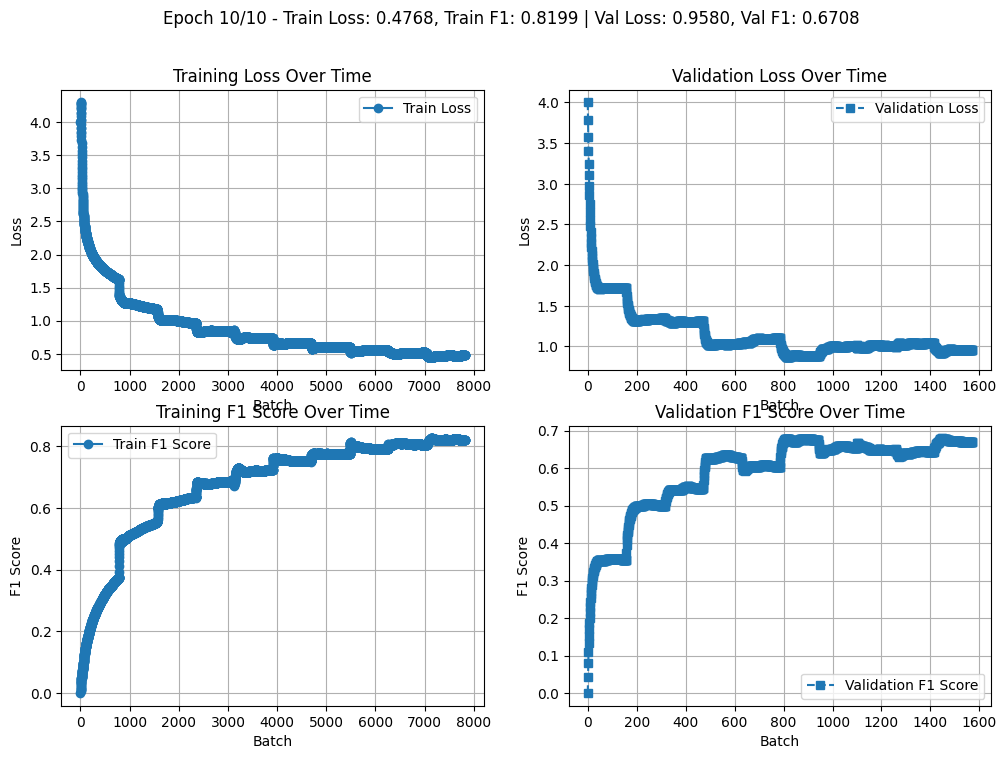

F1 Score: 0.6918, Precision: 0.7545, Accuracy: 0.6871
              precision    recall  f1-score   support

           0       0.86      0.67      0.75      1000
           1       0.98      0.64      0.77      1000
           2       0.70      0.60      0.65      1000
           3       0.52      0.63      0.57      1000
           4       0.47      0.89      0.62      1000
           5       0.79      0.50      0.61      1000
           6       0.56      0.92      0.70      1000
           7       0.98      0.53      0.69      1000
           8       0.77      0.85      0.81      1000
           9       0.91      0.65      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.75      0.69      0.69     10000
weighted avg       0.75      0.69      0.69     10000



In [8]:
model_arch = 'wider_cnn'
model = CNNClassifier( model_arch, intermediate_activation = nn.ReLU )
optimizer = optim.AdamW( model.parameters(), lr = 0.001, weight_decay = 0.01 )
train_losses, val_losses, train_f1_scores, val_f1_scores = train_and_evaluate( model, optimizer, train_loader, val_loader, 10, device, is_sam = False )

f1, precision, accuracy, report = evaluation( model, val_loader, device )
print( f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}" )
print( report )

model_data['name'].append( model_arch )
model_data['train_losses'].append( train_losses[-1] )
model_data['val_losses'].append( val_losses[-1] )
model_data['train_f1_scores'].append( train_f1_scores[-1] )
model_data['val_f1_scores'].append( val_f1_scores[-1] )
model_data['val_precision'].append( precision )
model_data['val_accuracy'].append( accuracy )

## Botte Neck Cnn

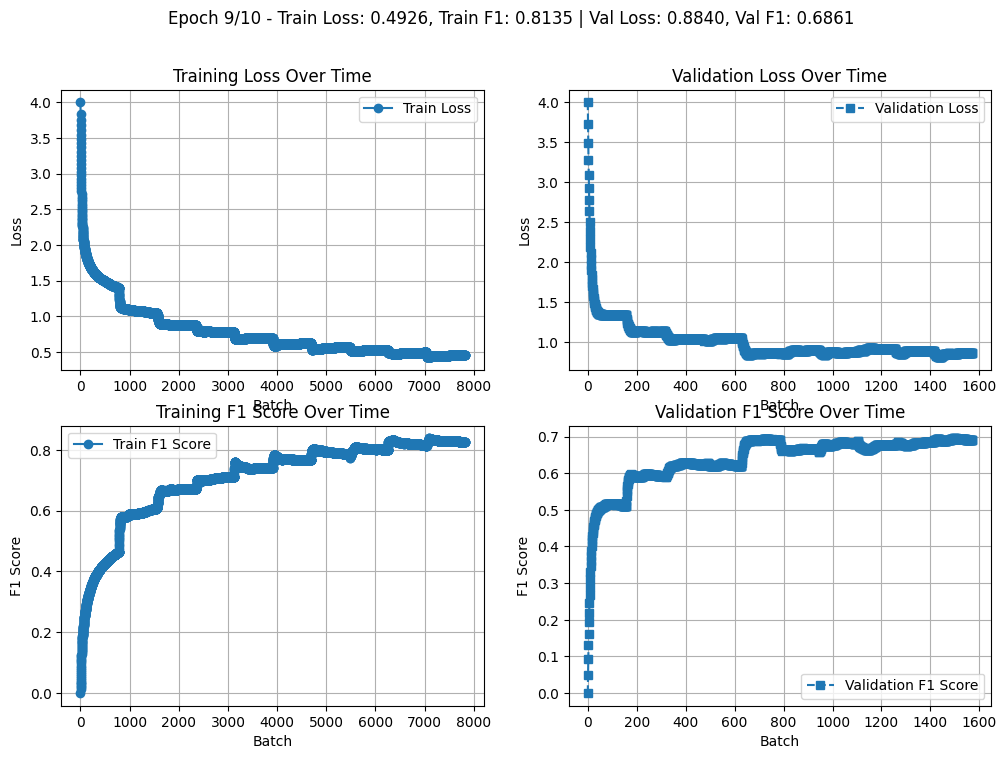

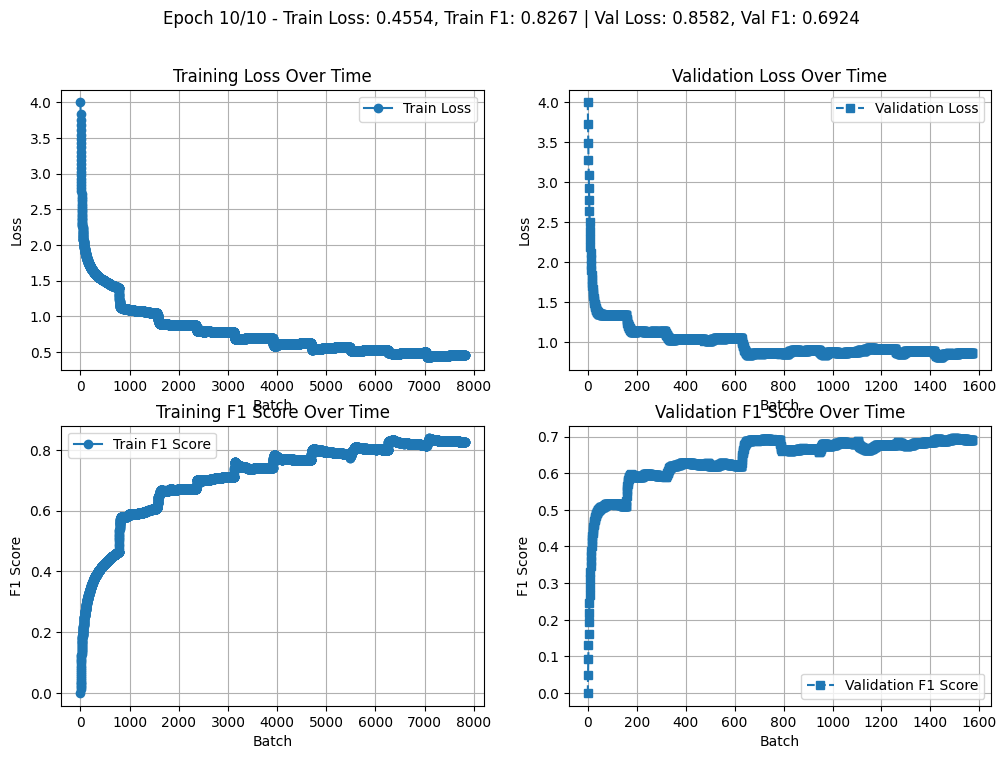

F1 Score: 0.7120, Precision: 0.7381, Accuracy: 0.7129
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.91      0.77      0.83      1000
           2       0.60      0.68      0.64      1000
           3       0.60      0.43      0.50      1000
           4       0.64      0.74      0.69      1000
           5       0.74      0.53      0.62      1000
           6       0.53      0.94      0.68      1000
           7       0.91      0.67      0.77      1000
           8       0.78      0.90      0.84      1000
           9       0.90      0.70      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.71     10000
weighted avg       0.74      0.71      0.71     10000



In [9]:
model_arch = 'botte_neck_cnn'
model = CNNClassifier( model_arch, intermediate_activation = nn.ReLU )
optimizer = SAM( model.parameters(), base_optimizer = optim.AdamW, rho = 0.05, lr = 0.001, weight_decay = 0.01 )
train_losses, val_losses, train_f1_scores, val_f1_scores = train_and_evaluate( model, optimizer, train_loader, val_loader, 10, device, is_sam = True )

f1, precision, accuracy, report = evaluation( model, val_loader, device )
print( f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}" )
print( report )

model_data['name'].append( model_arch )
model_data['train_losses'].append( train_losses[-1] )
model_data['val_losses'].append( val_losses[-1] )
model_data['train_f1_scores'].append( train_f1_scores[-1] )
model_data['val_f1_scores'].append( val_f1_scores[-1] )
model_data['val_precision'].append( precision )
model_data['val_accuracy'].append( accuracy )

## Compacted Cnn

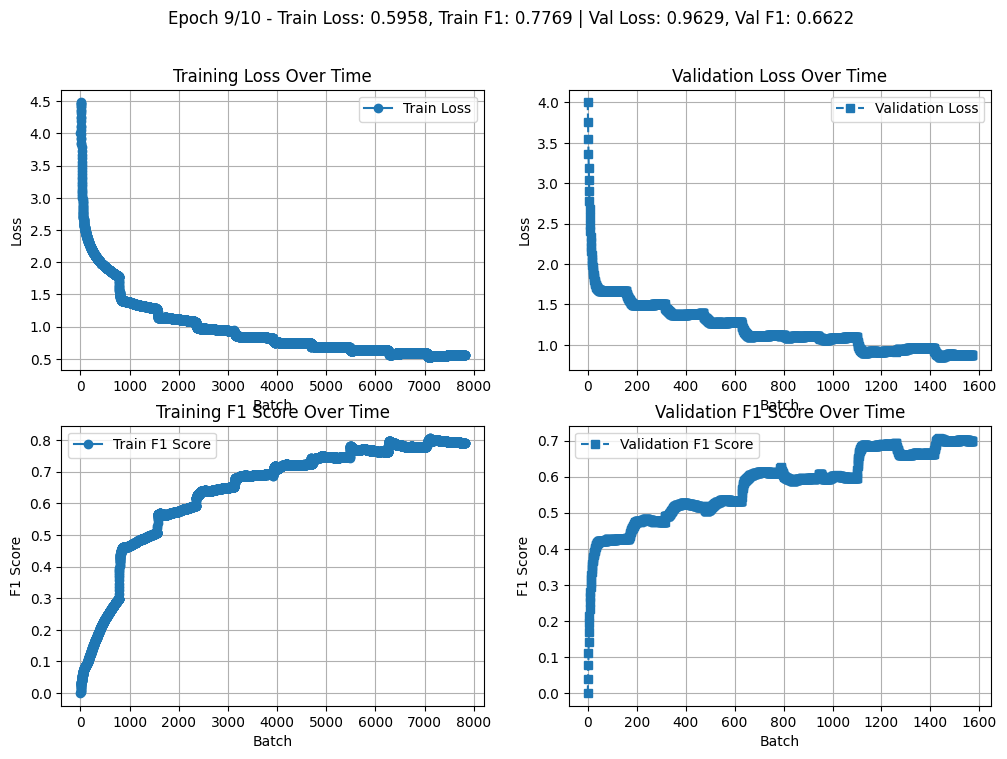

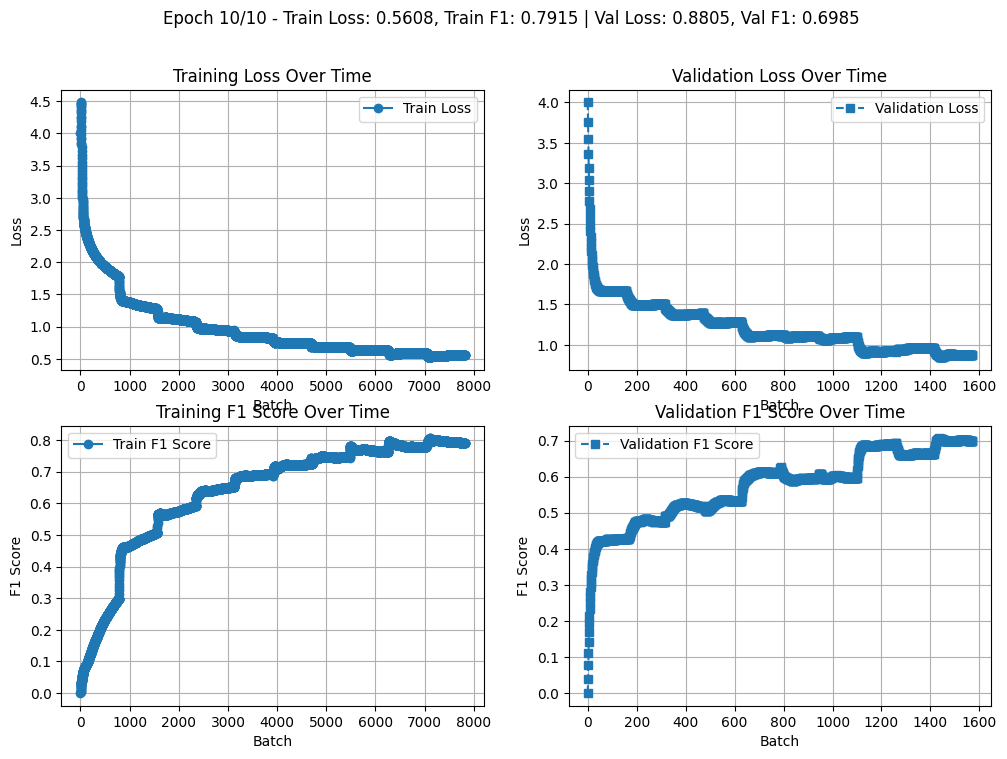

F1 Score: 0.7176, Precision: 0.7556, Accuracy: 0.7173
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.97      0.73      0.83      1000
           2       0.71      0.59      0.65      1000
           3       0.62      0.53      0.57      1000
           4       0.57      0.83      0.67      1000
           5       0.75      0.55      0.64      1000
           6       0.54      0.94      0.68      1000
           7       0.93      0.57      0.70      1000
           8       0.77      0.92      0.84      1000
           9       0.92      0.69      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.76      0.72      0.72     10000
weighted avg       0.76      0.72      0.72     10000



In [10]:
model_arch = 'compacted_cnn'
model = CNNClassifier( model_arch, intermediate_activation = nn.ReLU )
optimizer = SAM( model.parameters(), base_optimizer = optim.AdamW, rho = 0.05, lr = 0.001, weight_decay = 0.01 )
train_losses, val_losses, train_f1_scores, val_f1_scores = train_and_evaluate( model, optimizer, train_loader, val_loader, 10, device, is_sam = True )

f1, precision, accuracy, report = evaluation( model, val_loader, device )
print( f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}" )
print( report )

model_data['name'].append( model_arch )
model_data['train_losses'].append( train_losses[-1] )
model_data['val_losses'].append( val_losses[-1] )
model_data['train_f1_scores'].append( train_f1_scores[-1] )
model_data['val_f1_scores'].append( val_f1_scores[-1] )
model_data['val_precision'].append( precision )
model_data['val_accuracy'].append( accuracy )

## Custom Pyramidal Inception Classifier (Ensemble)

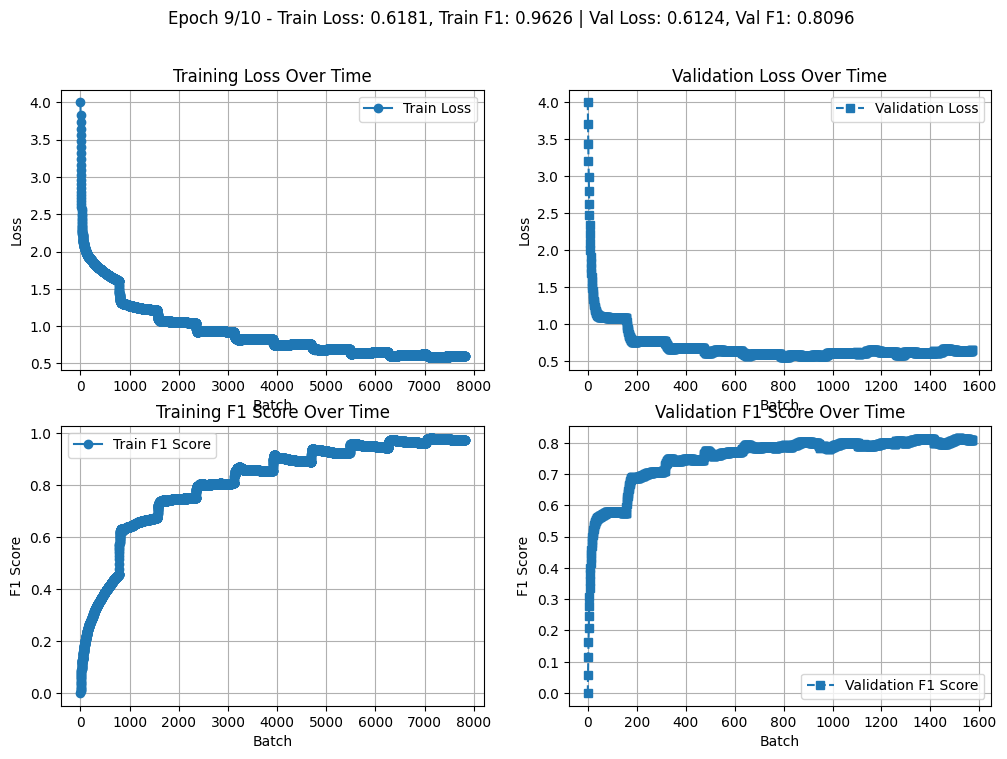

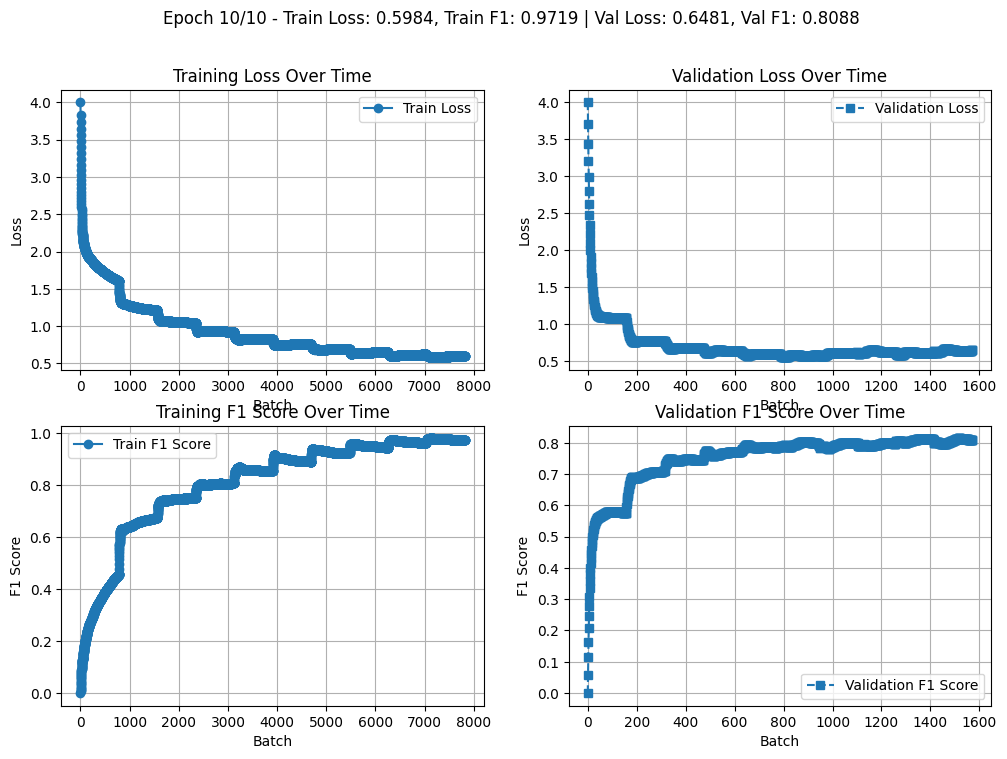

F1 Score: 0.8235, Precision: 0.8267, Accuracy: 0.8239
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1000
           1       0.94      0.90      0.92      1000
           2       0.82      0.73      0.77      1000
           3       0.71      0.64      0.67      1000
           4       0.75      0.85      0.80      1000
           5       0.73      0.77      0.75      1000
           6       0.90      0.83      0.87      1000
           7       0.77      0.90      0.83      1000
           8       0.91      0.90      0.90      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



In [11]:
model = PyramidalInceptionClassifier( intermediate_activation = nn.ReLU )
optimizer = SAM( model.parameters(), base_optimizer = optim.AdamW, rho = 0.05, lr = 0.001, weight_decay = 0.01 )
train_losses, val_losses, train_f1_scores, val_f1_scores = train_and_evaluate( model, optimizer, train_loader, val_loader, 10, device, is_sam = True )

f1, precision, accuracy, report = evaluation( model, val_loader, device )
print( f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}" )
print( report )

model_data['name'].append( 'pyramidal_inception' )
model_data['train_losses'].append( train_losses[-1] )
model_data['val_losses'].append( val_losses[-1] )
model_data['train_f1_scores'].append( train_f1_scores[-1] )
model_data['val_f1_scores'].append( val_f1_scores[-1] )
model_data['val_precision'].append( precision )
model_data['val_accuracy'].append( accuracy )

# Compile The results

In [12]:
import pandas as pd

df_results = pd.DataFrame( model_data )
df_results.head(10)

,name,train_losses,val_losses,train_f1_scores,val_f1_scores,val_precision,val_accuracy
0,simple_cnn,0.519989,1.779055,0.801542,0.440562,0.688626,0.4602
1,deeper_cnn,0.517720,0.892297,0.805951,0.677031,0.752320,0.6984
2,wider_cnn,0.476677,0.958293,0.820008,0.670448,0.754484,0.6871
3,botte_neck_cnn,0.455233,0.858292,0.826753,0.691645,0.738076,0.7129
4,compacted_cnn,0.560332,0.880757,0.791603,0.699142,0.755591,0.7173
5,pyramidal_inception,0.598097,0.644554,0.972036,0.809602,0.826654,0.8239


# Analyze Pyramidal Inception Classifier Heads

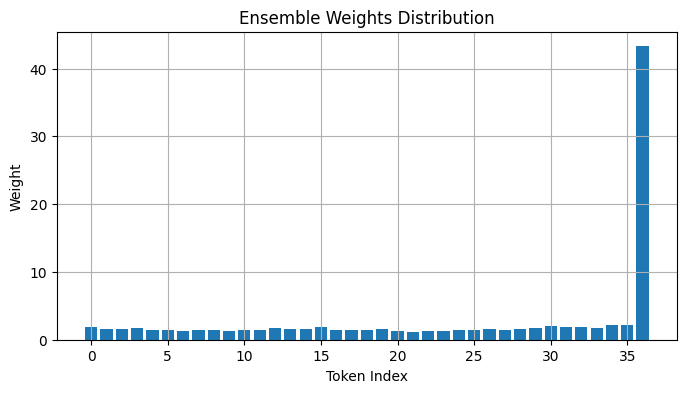

In [13]:
w = model.ensemble_weights.detach().cpu().numpy()
w = ( np.exp( w ) / np.sum( np.exp( w ) ) ) * 100
plt.figure( figsize = ( 8, 4 ) )
plt.bar( range( 37 ), w )
plt.xlabel( "Token Index" )
plt.ylabel( "Weight" )
plt.title( "Ensemble Weights Distribution" )
plt.grid()
plt.show()

In [14]:
i, t = next( iter( train_loader ) )
p = model._forward( i.to( device ) ).argmax( dim = 2 )

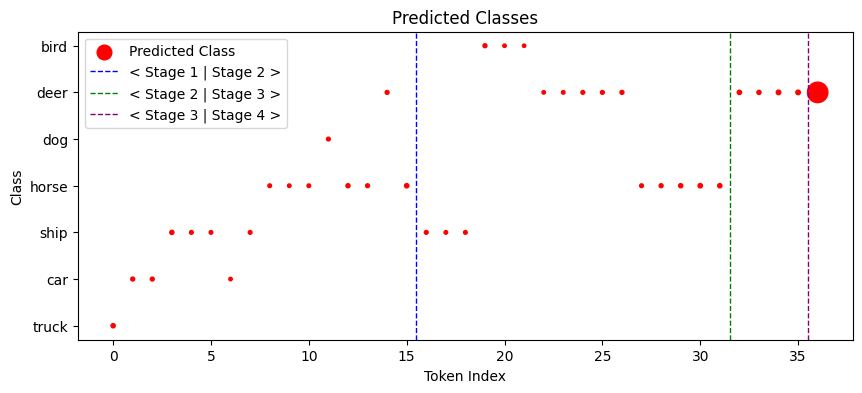

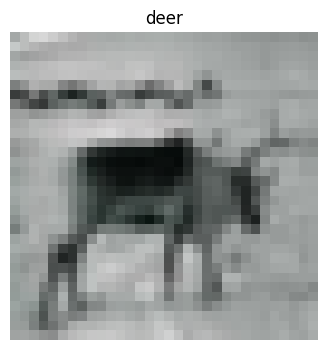

In [21]:
idx = 2
pred = p[idx].cpu().numpy()

plt.figure( figsize = ( 10, 4 ) )
plt.scatter( range( 37 ), cifar_classes[pred], c = 'r', label = 'Predicted Class', s = (w*5) )
plt.axvline( x = 15.5, color = 'b', linestyle = '--', linewidth=1, label = "< Stage 1 | Stage 2 >" )
plt.axvline( x = 31.5, color = 'g', linestyle = '--', linewidth=1, label = "< Stage 2 | Stage 3 >" )
plt.axvline( x = 35.5, color = 'purple', linestyle = '--', linewidth=1, label = "< Stage 3 | Stage 4 >" )
plt.xlabel( "Token Index" )
plt.ylabel( "Class" )
plt.title( "Predicted Classes" )
plt.legend()
plt.show()

plt.figure( figsize = ( 8, 4 ) )
plt.imshow( i[idx].permute( 1, 2, 0 ) * 0.5 + 0.5 )
plt.axis( 'off' )
plt.title( cifar_classes[t[idx].item()] )
plt.show()